In [1]:
import pandas as pd
#import gc
#gc.collect()
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
filename_base = 'allraw-12h-apr23-combined'
filename_in = f'{filename_base}.csv'
#filename_out = f'{filename_base}-combined.csv'

In [3]:
#df = pd.read_csv('allraw.csv', header=None); print(df.shape, df.size)
df = pd.read_csv(filename_in, 
                 ##header=True,
                 low_memory=False,
                 index_col='datetime'
                 #parse_dates=['datetime']
                 #nrows=4000000
                ); print(df.shape, df.size)

(3252478, 17) 55292126


In [4]:
df['baro_altitude'] = round(df['baro_altitude']*3.28084) #convert meters to feet
df['geo_altitude'] = round(df['geo_altitude']*3.28084) #convert meters to feet
df.head()

,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,true_track,vertical_rate,sensors,geo_altitude,squawk,spi,position_source
datetime,,,,,,,,,,,,,,,,,
2019-04-23 00:31:09,ac96b8,AAL1023,United States,1.555979e+09,1555979469,-80.6794,26.7790,26600.0,False,215.26,339.14,7.48,NaN,27650.0,3620.0,False,0
2019-04-23 00:31:09,a2e5ec,SKW3880,United States,1.555979e+09,1555979469,-80.0558,41.5948,29000.0,False,236.57,104.10,-0.33,NaN,29575.0,511.0,False,0
2019-04-23 00:31:09,aa56da,UAL487,United States,1.555979e+09,1555979186,-82.7790,38.2965,37000.0,False,243.96,85.89,0.00,NaN,37775.0,1775.0,False,0
2019-04-23 00:31:09,7c6b2f,JST231,Australia,1.555979e+09,1555979469,172.8840,-42.1640,29100.0,False,216.87,196.11,-8.13,NaN,29875.0,5702.0,False,0
2019-04-23 00:31:09,88044e,AIQ566,Thailand,1.555979e+09,1555979469,102.7020,17.8246,33000.0,False,250.41,28.20,0.33,NaN,35150.0,705.0,False,0


In [5]:
df.icao24.describe()

count     3252478
unique      29352
top        4d002a
freq          729
Name: icao24, dtype: object

In [6]:
df.callsign.describe()

count      3043699
unique       45816
top               
freq          8641
Name: callsign, dtype: object

In [7]:
df.origin_country.describe()

count           3252219
unique              130
top       United States
freq             982839
Name: origin_country, dtype: object

In [8]:
#df.loc[df['velocity']<20]
#t = df.groupby(['callsign'])
#t.head()

In [9]:
df.head()

,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,true_track,vertical_rate,sensors,geo_altitude,squawk,spi,position_source
datetime,,,,,,,,,,,,,,,,,
2019-04-23 00:31:09,ac96b8,AAL1023,United States,1.555979e+09,1555979469,-80.6794,26.7790,8107.68,False,215.26,339.14,7.48,NaN,8427.72,3620.0,False,0
2019-04-23 00:31:09,a2e5ec,SKW3880,United States,1.555979e+09,1555979469,-80.0558,41.5948,8839.20,False,236.57,104.10,-0.33,NaN,9014.46,511.0,False,0
2019-04-23 00:31:09,aa56da,UAL487,United States,1.555979e+09,1555979186,-82.7790,38.2965,11277.60,False,243.96,85.89,0.00,NaN,11513.82,1775.0,False,0
2019-04-23 00:31:09,7c6b2f,JST231,Australia,1.555979e+09,1555979469,172.8840,-42.1640,8869.68,False,216.87,196.11,-8.13,NaN,9105.90,5702.0,False,0
2019-04-23 00:31:09,88044e,AIQ566,Thailand,1.555979e+09,1555979469,102.7020,17.8246,10058.40,False,250.41,28.20,0.33,NaN,10713.72,705.0,False,0


## mean geo-altitude by callsign

In [10]:
#too many: 45816 callsigns
'''
plt.figure(figsize=(10,45))
ax = sns.barplot(y='callsign', x='geo_altitude', data=df, color='lightblue', ci=None)
#ax.set(xlabel='mean altitude')
plt.title(f'Mean geoaltitude by callsign', loc='left', fontsize=15, fontweight='bold')
# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xlabel('mean geo-altitude')
plt.tick_params(top=False, bottom=False, left=False, right=False)
#plt.text('asdfsdf', 20000, 1000)
ax.xaxis.grid()
'''

"\nplt.figure(figsize=(10,45))\nax = sns.barplot(y='callsign', x='geo_altitude', data=df, color='lightblue', ci=None)\n#ax.set(xlabel='mean altitude')\nplt.title(f'Mean geoaltitude by callsign', loc='left', fontsize=15, fontweight='bold')\n# remove the frame of the chart\nfor spine in plt.gca().spines.values():\n    spine.set_visible(False)\nplt.xlabel('mean geo-altitude')\nplt.tick_params(top=False, bottom=False, left=False, right=False)\n#plt.text('asdfsdf', 20000, 1000)\nax.xaxis.grid()\n"

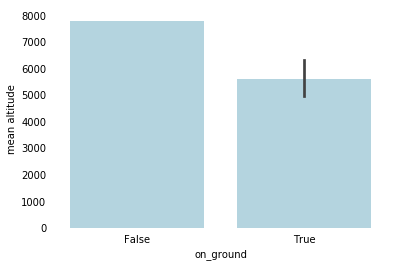

In [13]:
ax = sns.barplot(x='on_ground', y='geo_altitude', data=df, color='lightblue', estimator=np.mean)
ax.set(ylabel='mean altitude')
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)
plt.tick_params(top=False, bottom=False, left=False, right=False)

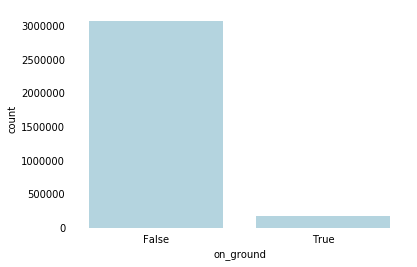

In [10]:
sns.countplot(x='on_ground', data=df, color='lightblue')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.tick_params(top=False, bottom=False, left=False, right=False)

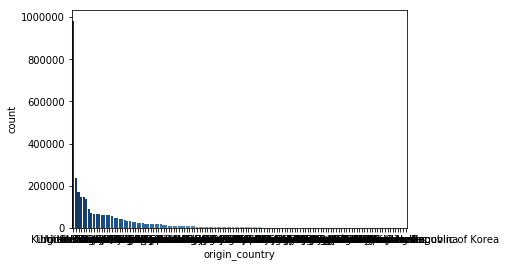

In [4]:
sns.barplot(x='origin_country', data=df, order=df['origin_country'].value_counts().index, palette='Blues_r')

3252478
3252478


Text(30000, -40, '$\\mu=100,\\ \\sigma=15$')

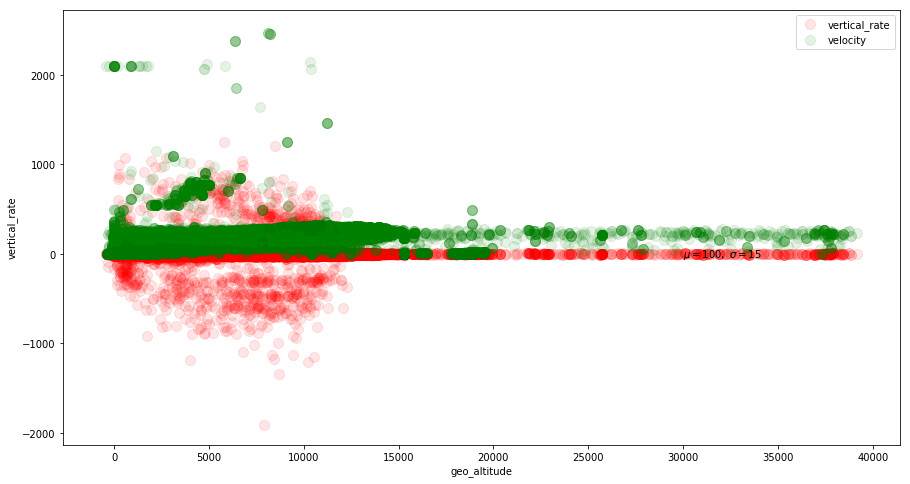

In [22]:
fig,ax = plt.subplots(1, 1, figsize=(15,8))
print(len(df.geo_altitude)); print(len(df.vertical_rate))
ax.scatter(x='geo_altitude', y='vertical_rate', data=df, s=100, c='r', alpha=0.1, label='vertical_rate')
ax.scatter(x='geo_altitude', y='velocity', data=df, s=100, c='g', alpha=0.1, label='velocity')
#ax.set_xlim(min(df.geo_altitude), max(df.geo_altitude))
ax.set_ylabel('vertical_rate')
ax.set_xlabel('geo_altitude')
ax.legend()
plt.text(30000, -40, r'$\mu=100,\ \sigma=15$')


## Specific flights

In [10]:
df.head()

,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,true_track,vertical_rate,sensors,geo_altitude,squawk,spi,position_source
datetime,,,,,,,,,,,,,,,,,
2019-04-23 00:31:09,ac96b8,AAL1023,United States,1.555979e+09,1555979469,-80.6794,26.7790,8107.68,False,215.26,339.14,7.48,NaN,8427.72,3620.0,False,0
2019-04-23 00:31:09,a2e5ec,SKW3880,United States,1.555979e+09,1555979469,-80.0558,41.5948,8839.20,False,236.57,104.10,-0.33,NaN,9014.46,511.0,False,0
2019-04-23 00:31:09,aa56da,UAL487,United States,1.555979e+09,1555979186,-82.7790,38.2965,11277.60,False,243.96,85.89,0.00,NaN,11513.82,1775.0,False,0
2019-04-23 00:31:09,7c6b2f,JST231,Australia,1.555979e+09,1555979469,172.8840,-42.1640,8869.68,False,216.87,196.11,-8.13,NaN,9105.90,5702.0,False,0
2019-04-23 00:31:09,88044e,AIQ566,Thailand,1.555979e+09,1555979469,102.7020,17.8246,10058.40,False,250.41,28.20,0.33,NaN,10713.72,705.0,False,0


In [5]:
#df.loc[df['icao24'] == '4b1803']
df_callsign = df[df['callsign'].str.strip() == 'AAL1023']; print(df_callsign.shape)
#df[df['callsign'].str.contains('UAL1081')]
#df[df['callsign'].str.match('UAL1081')]
#df.loc[df['origin_country'] == 'Switzerland']

(111, 17)


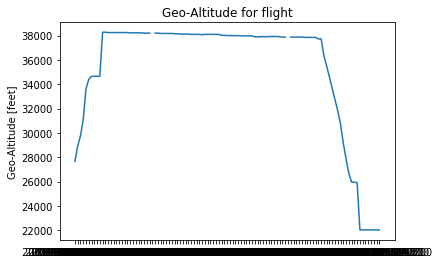

In [7]:
plt.plot(df_callsign.geo_altitude)
plt.ylabel('Geo-Altitude [feet]')
plt.title('Geo-Altitude for flight')
plt.show()

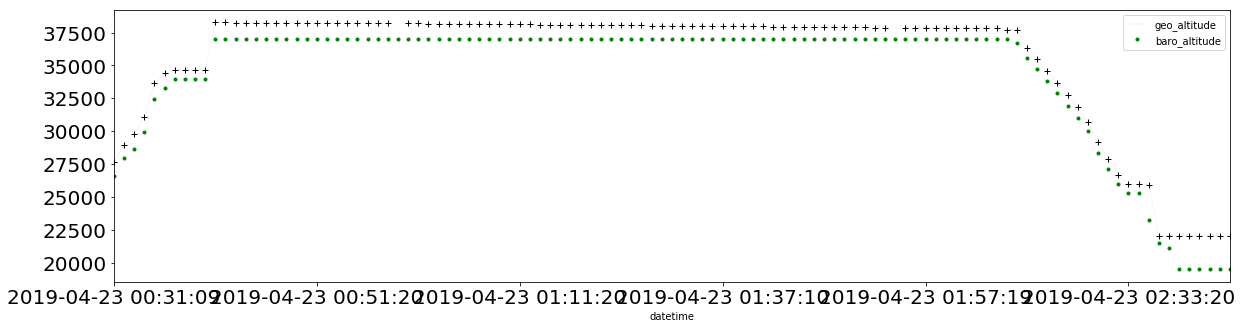

In [8]:
#df_callsign.loc['2018-06-01 13:00':'2018-06-01 16:30', ['geo_altitude']].plot(style='k+:', legend=True, linewidth=0.1)
df_callsign.loc[:, ['geo_altitude']].plot(style='k+:', legend=True, linewidth=0.1)
df_callsign['baro_altitude'].plot(color='g', 
                            style='.', 
                            linewidth=5, 
                            fontsize=20, 
                            legend=True, 
                            figsize=(20,5))
#plt.setp(p, linewidth=0.1)
#plt.axis(('2018-06-01 13:00', '2018-06-01 16:30', 0, 40000))
#plt.yscale('log')
plt.show()

In [9]:
print(list(df.columns))

['icao24', 'callsign', 'origin_country', 'time_position', 'last_contact', 'longitude', 'latitude', 'baro_altitude', 'on_ground', 'velocity', 'true_track', 'vertical_rate', 'sensors', 'geo_altitude', 'squawk', 'spi', 'position_source']


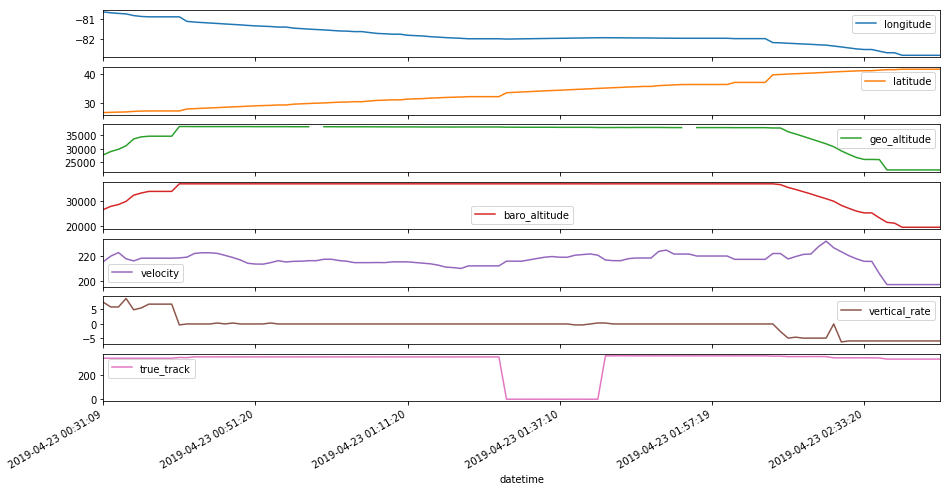

In [10]:
df_callsign.loc[:, ['longitude','latitude','geo_altitude','baro_altitude','velocity','vertical_rate','true_track']].plot(subplots=True, figsize=(15,8))
plt.show()

In [11]:
callsigns = df.callsign.unique(); print(type(callsigns)); print(len(callsigns))
icao24s = df.icao24.unique(); print(type(icao24s)); print(len(icao24s))

<class 'numpy.ndarray'>
45817
<class 'numpy.ndarray'>
29352


In [12]:
#interesting
#AIQ566,UAL2197, UAL291,SWA2301,SWA2274,N286SP,UAL587,DAL1524,G72237,
#other: ENY3773,N457WB,N833EF,NCR141,CPZ5857,
#long: UAL413,SKL8,N952AL,FDX1366,DAL2433,TAP087,TVS2512,N746E,

In [13]:
callsigns[60:70]

array(['1253    ', 'FFT1427 ', 'UAL510  ', 'AAL580  ', 'CPZ5857 ',
       'AWQ102  ', 'SWA1387 ', 'UAL2412 ', 'AZU9901 ', 'NKS552  '],
      dtype=object)

(9, 17)


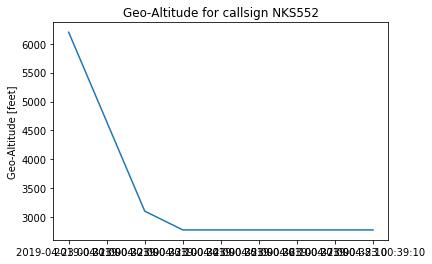

In [14]:
callsign = 'NKS552'
df_callsign = df[df['callsign'].str.strip() == callsign]; print(df_callsign.shape)
df_callsign.sort_index(inplace=True)
plt.plot(df_callsign.geo_altitude)
plt.ylabel('Geo-Altitude [feet]')
plt.title(f'Geo-Altitude for callsign {callsign}')
plt.show()

In [15]:
#df[df['on_ground']==True]

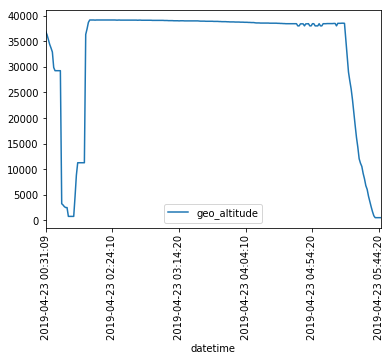

In [42]:
i=100
df_callsign = df[df['callsign'] == callsigns[i]]
#df_callsign
#df_callsign = df_callsign.sort_values(by=['datetime'])
#plt.plot(df_callsign.index, df_callsign.geo_altitude, 'o:')
df_callsign.loc[:,['geo_altitude']].plot(rot=90)

In [12]:
df_callsign.loc['2019-04-23 00:00':'2019-04-24 06:00']

,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,true_track,vertical_rate,sensors,geo_altitude,squawk,spi,position_source
datetime,,,,,,,,,,,,,,,,,
2019-04-23 00:31:09,aab9aa,SWA1165,United States,1.555979e+09,1555979468,-86.5840,38.2222,10972.80,False,226.52,212.10,0.00,NaN,11239.50,6545.0,False,0
2019-04-23 00:32:09,aab9aa,SWA1165,United States,1.555980e+09,1555979529,-86.6683,38.1159,10782.30,False,226.36,212.28,-4.55,NaN,11049.00,6545.0,False,0
2019-04-23 00:33:10,aab9aa,SWA1165,United States,1.555980e+09,1555979588,-86.7448,38.0196,10492.74,False,220.85,211.76,-4.55,NaN,10759.44,6545.0,False,0
2019-04-23 00:34:09,aab9aa,SWA1165,United States,1.555980e+09,1555979649,-86.8289,37.9120,10195.56,False,223.41,211.82,-4.55,NaN,10469.88,6545.0,False,0
2019-04-23 00:35:09,aab9aa,SWA1165,United States,1.555980e+09,1555979709,-86.9064,37.8135,9906.00,False,226.25,211.99,-4.55,NaN,10256.52,6545.0,False,0
2019-04-23 00:36:10,aab9aa,SWA1165,United States,1.555980e+09,1555979750,-86.9647,37.7392,9715.50,False,226.14,211.70,-4.88,NaN,10020.30,6545.0,False,0
2019-04-23 00:37:09,aab9aa,SWA1165,United States,1.555980e+09,1555979828,-87.0674,37.6072,8801.10,False,214.58,211.67,-12.03,NaN,9098.28,6545.0,False,0
2019-04-23 00:38:10,aab9aa,SWA1165,United States,1.555980e+09,1555979878,-87.0861,37.5831,8625.84,False,212.56,211.84,-11.70,NaN,8907.78,6545.0,False,0
2019-04-23 00:39:10,aab9aa,SWA1165,United States,1.555980e+09,1555979939,-87.0861,37.5831,8039.10,False,212.56,211.84,-11.70,NaN,8907.78,6545.0,False,0


In [20]:
from datetime import datetime

In [21]:
print(df.index.min())
print(df.index.max())

2019-04-23 00:31:09
2019-04-23 12:39:19


In [22]:
min_time = datetime.strptime(df.index.min(), '%Y-%m-%d %H:%M:%S'); print(min_time)
max_time = datetime.strptime(df.index.max(), '%Y-%m-%d %H:%M:%S'); print(max_time)

2019-04-23 00:31:09
2019-04-23 12:39:19


In [25]:
min_geo_altitude = df['geo_altitude'].min(); print(min_geo_altitude)
#max_geo_altitude = df['geo_altitude'].max(); print(max_geo_altitude)
max_geo_altitude = 60000

-1475.0


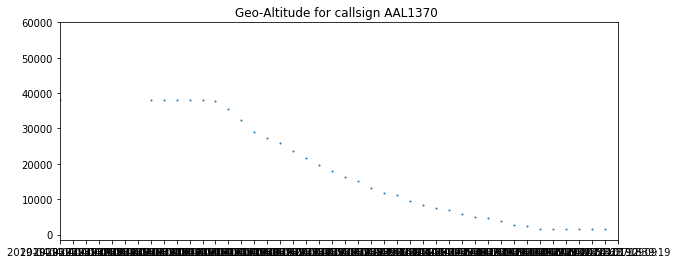

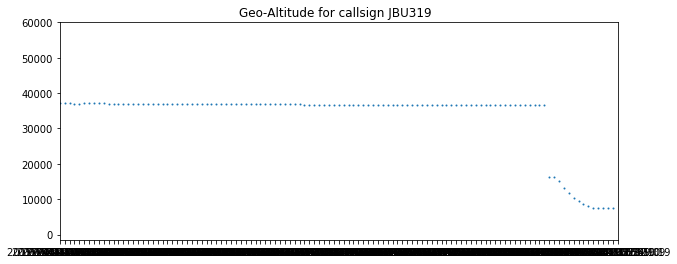

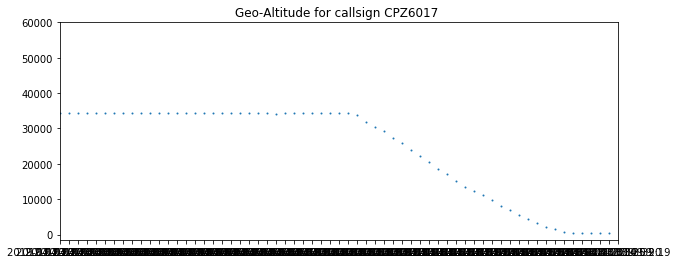

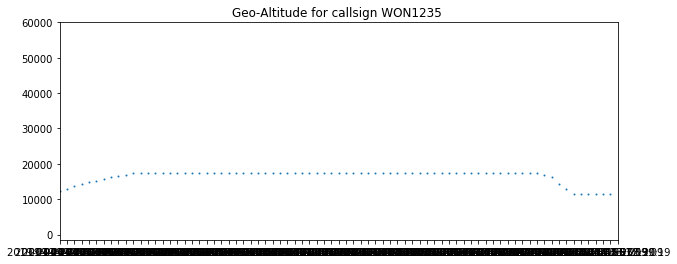

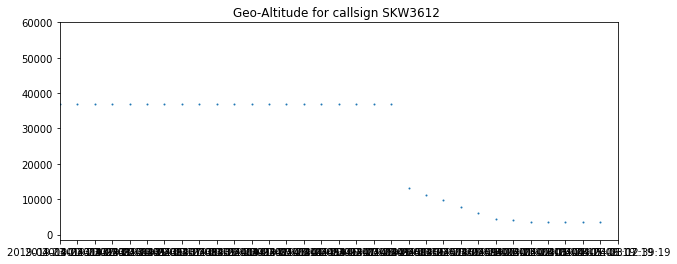

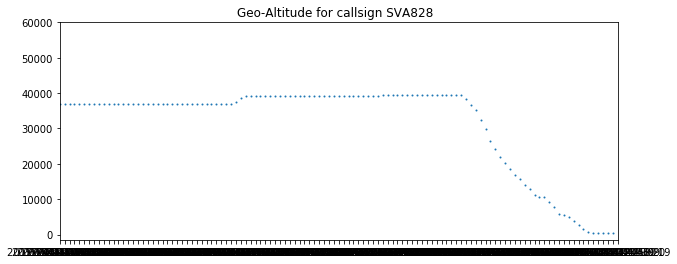

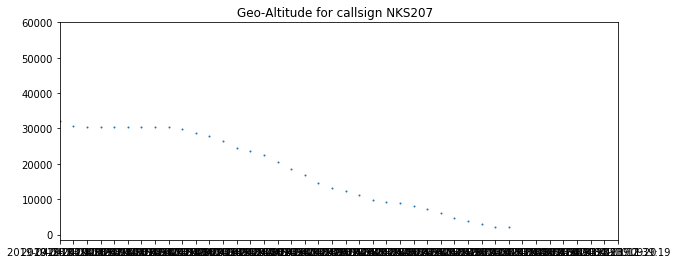

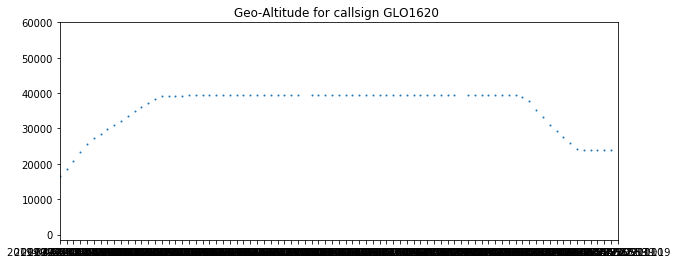

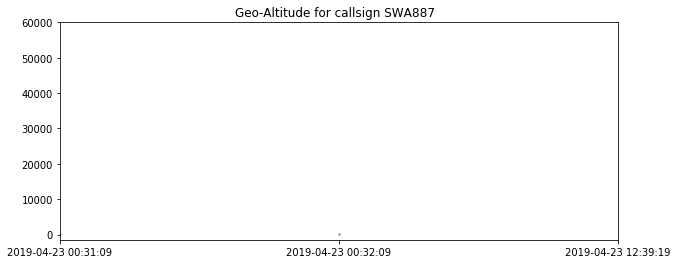

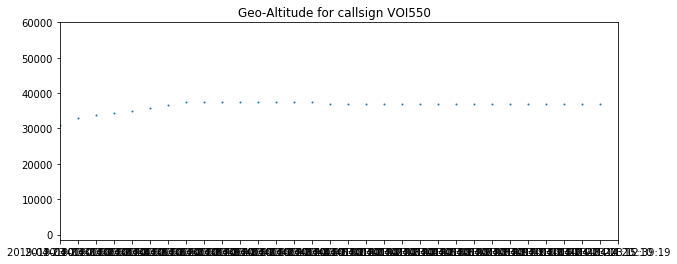

In [45]:
MARKER_SIZE = 1
#plt.figure(figsize=(20,12))
for i in range(500,510):
    plt.figure(figsize=(10,4))
    #fig,ax = plt.subplots(1, 1, figsize=(15,8))
    #ax.set_xlim(min_time, max_time)
    df_callsign = df[df['callsign'] == callsigns[i]]
    #df_callsign.sort_index(inplace=True)
    #df_callsign = df_callsign.sort_values(by=['datetime'])
    #ax.plot(df_callsign.index, df_callsign.geo_altitude, 'o:')
    #plt.plot(df_callsign.index, df_callsign.geo_altitude, 'o:')
    #df_callsign.loc[:,['geo_altitude']].plot(rot=90)
    #df_callsign.plot('geo_altitude')
    plt.scatter(df_callsign.index, df_callsign.geo_altitude, s=MARKER_SIZE)
    plt.xlim('2019-04-23 00:31:09', '2019-04-23 12:39:19')
    plt.ylim(min_geo_altitude, max_geo_altitude)
    #plt.ylabel('Geo-Altitude [meters]')
    plt.title(f'Geo-Altitude for callsign {callsigns[i]}')
    #plt.show()
    
#plt.show()
#plt.legend()   

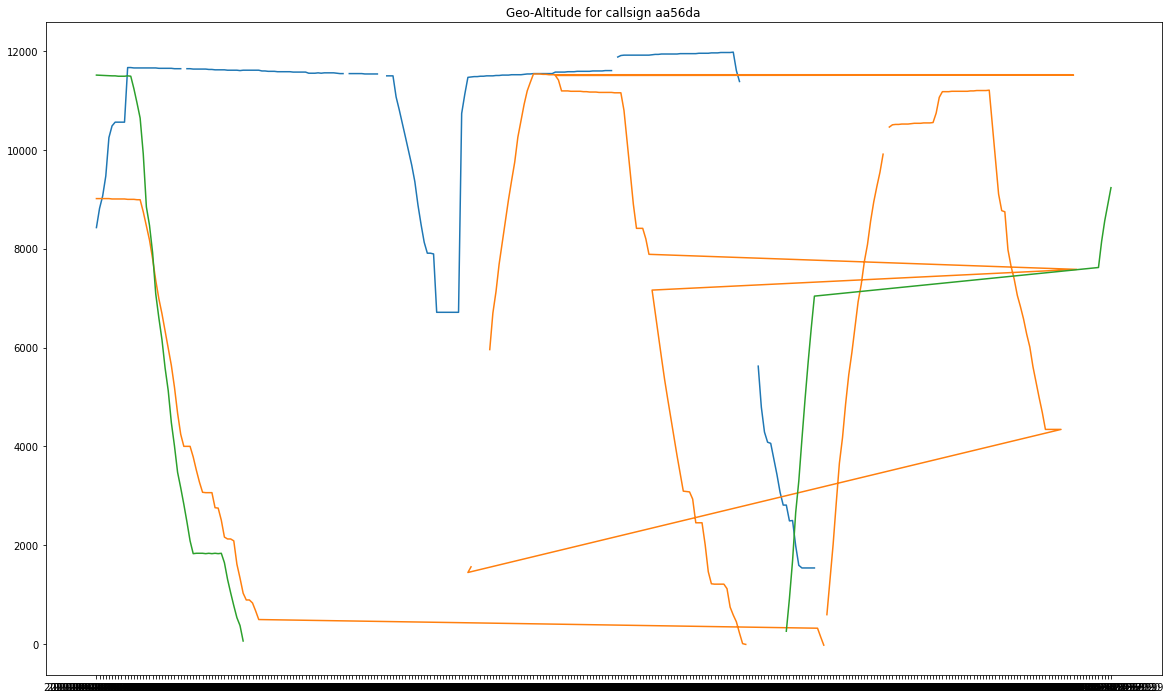

In [44]:
plt.figure(figsize=(20,12))
for i in range(0,3):
    df_icao24 = df[df['icao24'] == icao24s[i]]
    #df_icao24.sort_index(inplace=True)
    df_icao24 = df_icao24.sort_values(by=['datetime'])
    plt.plot(df_icao24.index, df_icao24.geo_altitude)
    #plt.scatter(df_icao24.index, df_icao24.geo_altitude, s=MARKER_SIZE)
    #plt.ylabel('Geo-Altitude [meters]')
    plt.title(f'Geo-Altitude for callsign {icao24s[i]}')

plt.show()
#plt.legend()   

In [95]:
sum(pd.Series(callsigns).str.strip()=='*AMX*')

0